# Question 1

### 1.d

Having implemented a 1D Gaussian filter that can be used both vertically and horizontally, we now observe its results under different combinations.

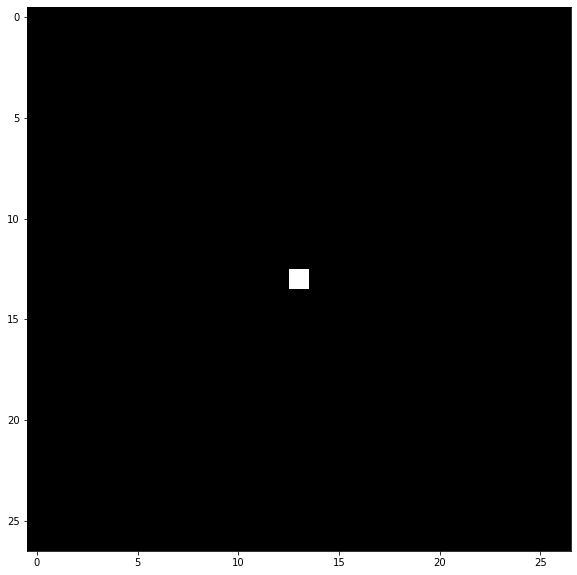

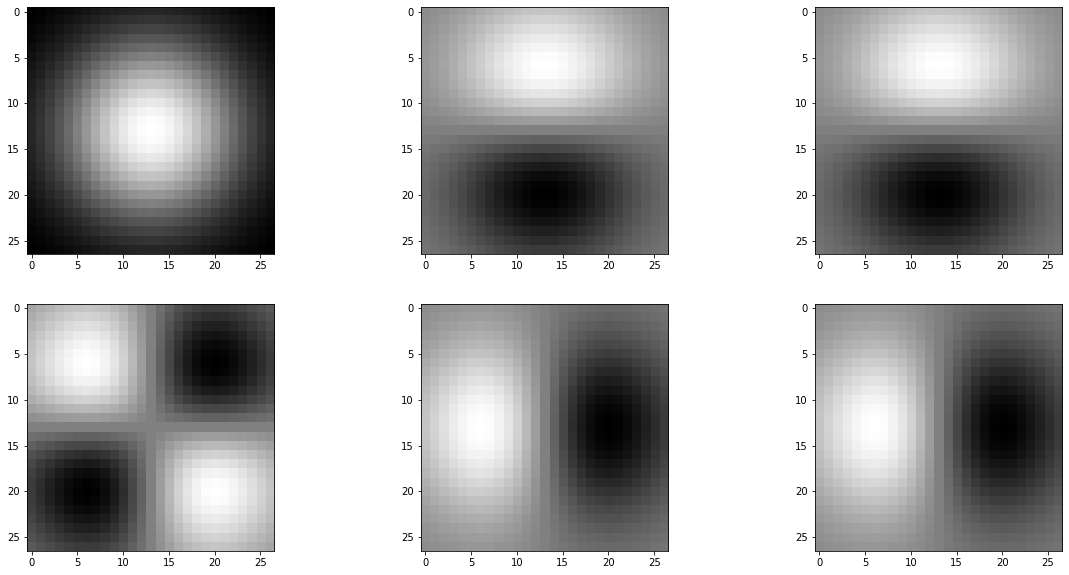

In [7]:
## function gaussdx (Question 1.d)

#### Subplot 1

In the first subplot, we have implemented a 1D Gaussian kernel in both x and y direction (Gx, Gx.T). Applying the horizontal and vertical gaussian filter smoothes the image in both directions, so that a single dot point of the initial image is expanded to 360 degrees. Since the end points of the gaussian filter have less weight, there is darkening towards the edges of the picture, while the center point has a lighter color.

#### Subplots 2/3/5/6

Knowing that both derivatives and convolutions are linear operations, it can be stated that:
* (Gx)(Dx.T)=(Dx.T)(Gx) => (Subplot2 = Subplot3) 
* (Dx)(Gx.T)=(Gx.T)(Dx) => (Subplot5 = Subplot6) 

Moreover, while 1D Gaussian derivative kernel in x-direction (Dx) detects vertical edges(as seen is subplots 5 and 6), the same kernel in y-direction (Dx.T) distinguishes horizantal edges(as seen in subplots 2 and 3). Applying a 1D Gaussian kernel in the opposite direction of the 1D Gaussian derivative kernel results in a smoothing of the image,  to inspect edge detection in the wide picture.

#### Subplot 4

In this last subplot, 1D Gaussian derivative kernels are applied in both x and y-direction. This implementation aims to detect vertical and horizontal edges. But since derivatives amplify high frequencies, noise becomes a major problem in this subplot.

### 1.e

We now turn to the derivative filter, to analyse its results on different images, with and without smoothing.

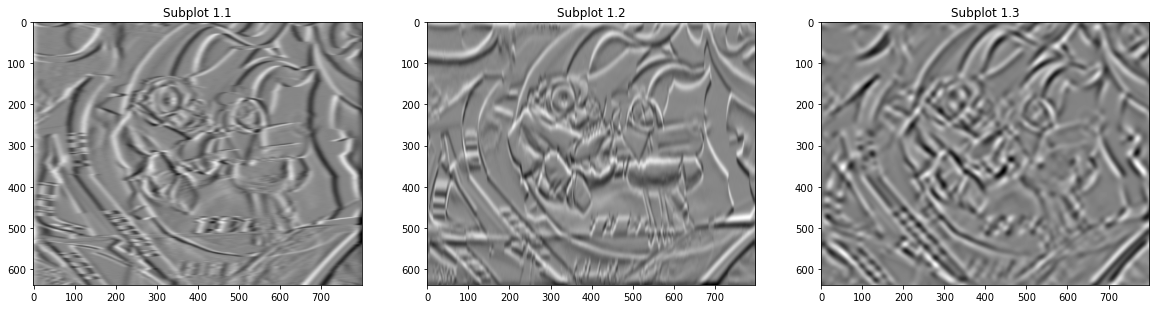

In [40]:
## function gaussderiv (Question 1.e)
## graf.png image without smoothing

[imgDx, imgDy] = gaussderiv(img, 7.0, smoothen_image=False)


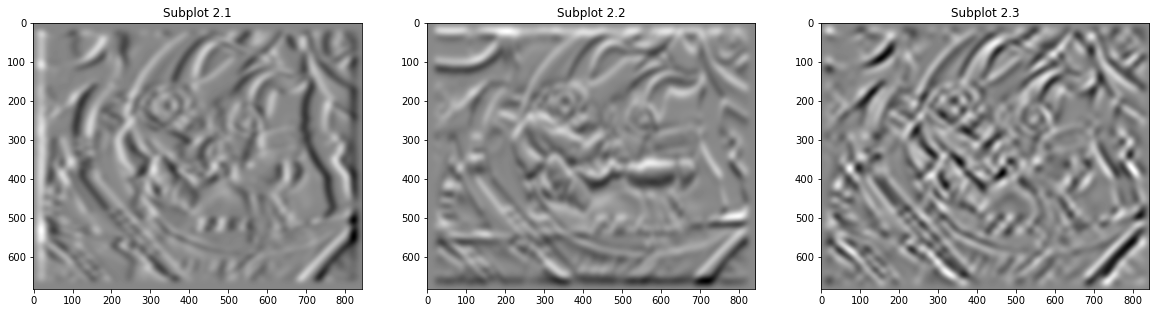

In [41]:
## function gaussderiv (Question 1.e)
## graf.png image with smoothing

[imgDx, imgDy] = gaussderiv(img, 7.0, smoothen_image=True)


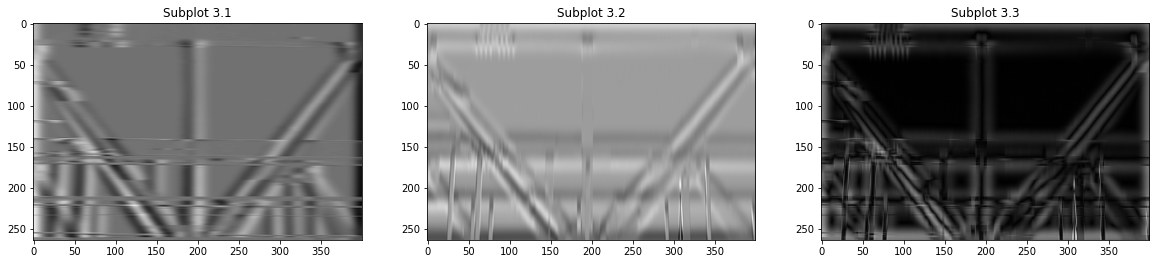

In [42]:
## function gaussderiv (Question 1.e)
## gantrycrane.png image without smoothing

[imgDx, imgDy] = gaussderiv(img, 7.0, smoothen_image=False)

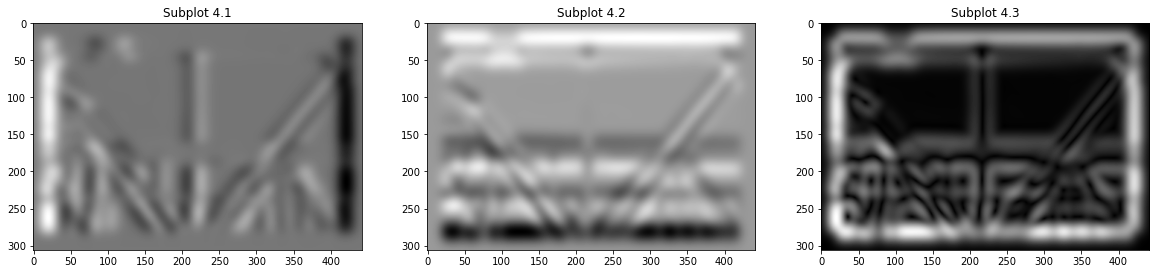

In [43]:
## function gaussderiv (Question 1.e)
## gantrycrane.png image with smoothing

[imgDx, imgDy] = gaussderiv(img, 7.0, smoothen_image=True)

As already stated, while vertical edges can be detected by partial derivative in x-direction(Dx), applying partial derivative in y-direction(Dy) detects horizantal edges. Thus, we can observe that:
* using derivative kernel Dx in the smoothed image sharpens vertical edges (subplots 2.1 and 4.1);
* using derivative kernel Dy in the smoothed image sharpens horizontal edges (subplots 2.2 and 4.2).

#### Diagonal Gradient Detection

Diagonal edge cannot be classfied as neither horizontal nor vertical. It is the combination of the partial derivatives in x and y-direction. Gradient image, detected diagonally, can be calculated using the following formula: 

*imgmag = np.sqrt(imgDx^2 + imgDy^2)*


It is important to note that imgDx and imgDy are smoothed before one directional edge detection. Edge detection in general perspective, gradient image, can be seen in the subplots 2.3 and 4.3.

#### Importance of smoothing before applying the derivative filter

Before applying the derivative filter to an image, it is important to reduce noise, since the use of such filters results in oscillations, which are interpreted as noise. In order to reduce noise, we applied a gaussian filter to smooth the images in subplots 2 and 4. The difference with subplots 1 and 3, were smoothing was not applied, highlight how implementing a derivative filter without smoothing increases the frequency, making the resulting image less clear.

Therefore, smoothing before using a derivative filter achieves a better final result.

# Question 3

### 3.b

In this section, we compare three models used to recognise colours and shapes by performing calculations based on previously defined histograms.   
We briefly report some theory aspects of those models and few characteristics of each one: 

<ol>
<li>Chi-square</li>
<li>Euclidean Distance</li>
<li>Intersection</li>
</ol> 



**Chi-Square**

$\chi^2(Q,V)= \sum_i\frac{(q_i-v_i)^2}{q_i+v_i}$

Chi-Square model tests the colour distribution for each image and generally guarantees good results.  
It is more discriminating but less robust than the intersection and generally has better results than   the Euclidean distance method.


**Euclidean distance**

$d(Q,V) = \sum_i(q_i-v_i)^2$

This model uses differences between histograms and weighs all the indexes equally.   
It is the least robust of the three. 

**Intersection**

$\cap(Q,V) = \sum_i(q_i, v_i) $

We used this approach for normalized histograms.   
This type of comparison emphasises the parts in common between the two histograms.    
Its peculiarity is robustness in several cases compared to the Euclidean and Chi Square method.

***Simulation structure***

For each model we analyse three different situations for nbins= 5,30,50:

<ol>
<li>Colour estimation using rg channels</li>
<li>Colour estimation using rgb channels</li>
<li>Shape estimation using dxdy</li>
</ol> 

The first one is made up of 3 simulations with the chi-square, euclidean and intersection process. 
For the second we added a third colour channel to see how variations would lead to different behaviours of the model.
In the third simulation, we used first applied a derived gaussian filter over the image, making our model more sensitive to the shape of an object than to the colour. 
At the end of each test with the different bins, we report some interpretations on how the model works and then we report the best configuration taking into account the highest recognition rate.
The recognition rate is given by a ratio between the number of correct matches images and the total number of the query image. 


#### Colour estimation using RG channels 

***Testing Chi_Squared with RG channel and 5 bins I.a***


In [134]:
dist_type = 'chi2';
hist_type = 'rg';
num_bins = 5;

number of correct matches: 72 (0.808989)



***Testing Chi_Squared with RG channel and 30 bins I.a***


In [133]:
dist_type = 'chi2';
hist_type = 'rg';
num_bins = 30;

number of correct matches: 66 (0.741573)



***Testing Chi_Squared with RG channel and 50 bins I.a***


In [135]:
dist_type = 'chi2';
hist_type = 'rg';
num_bins = 50;

number of correct matches: 72 (0.808989)



<Figure size 432x288 with 0 Axes>

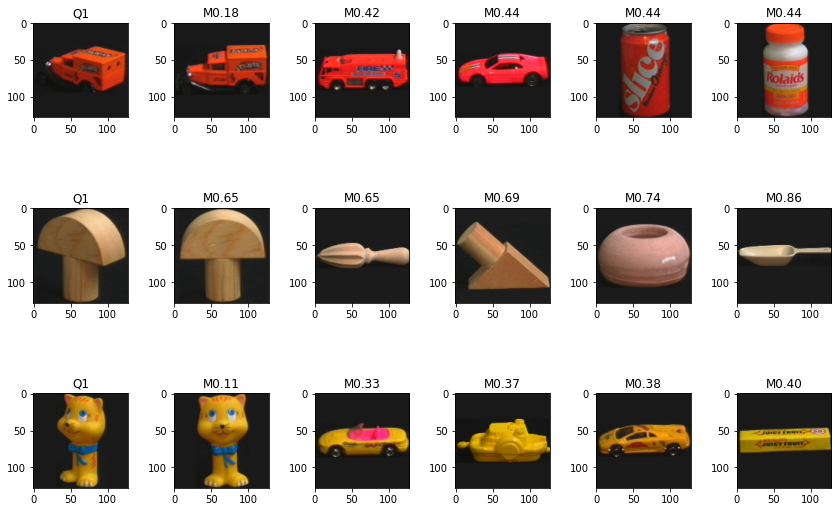

In [136]:
match_module.show_neighbors(model_images, query_images_vis, 'chi2', 'rg', 50)

In this case, we can see that colour recognition works well.
As we reported, this model looks into the colour distribution, disregarding the blue channel.   
For this simulation we have the best scenario with the following configuration: $rate = 72 (0.8089) @ nbins = 50 $

***Testing Euclidean Distance with RG channel and 5 bins I.b***


In [106]:
dist_type = 'l2';
hist_type = 'rg';
num_bins = 5;

number of correct matches: 55 (0.617978)



***Testing Euclidean Distance with RG channel and 30 bins I.b***


In [107]:
dist_type = 'l2';
hist_type = 'rg';
num_bins = 30;

number of correct matches: 39 (0.438202)



***Testing Euclidean Distance with RG channel and 50 bins I.b***


In [68]:
dist_type = 'l2';
hist_type = 'rg';
num_bins = 50;

number of correct matches: 31 (0.348315)



<Figure size 432x288 with 0 Axes>

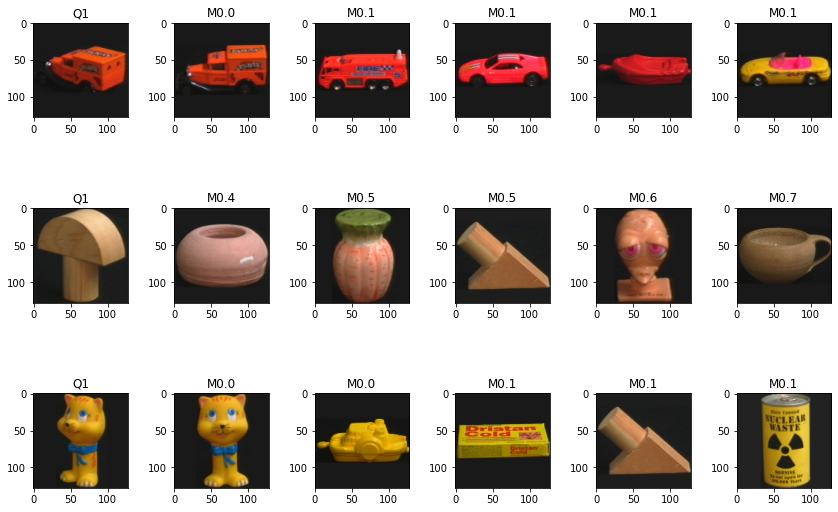

In [137]:
match_module.show_neighbors(model_images, query_images_vis, 'l2', 'rg', 5)

This case is less accurate, since it weights everything equally and adds up the square differences. 
We can try to emphasise some of the differences from the previous pattern by considering that its limit is that many times the results are incorrect, because it takes into account local differences and loses general validity.
We have seen that as the number of bins increases this model tends to have a lower recognition rate (only 31 matches for nbins=50), contrary to the others.
The less detail we have in colour coding, the more successful it gets. 
If the process becomes more discriminatory, the pattern makes a mistake. 
For this simulation we have the best scenario with the following configuration: $rate = 55 (0.6179) @ nbins = 5 $

***Testing Intersection with RG channel and 5 bins I.c***


In [108]:
dist_type = 'intersect';
hist_type = 'rg';
num_bins = 5;

number of correct matches: 63 (0.707865)



***Testing Intersection with RG channel and 30 bins I.c***


In [109]:
dist_type = 'intersect';
hist_type = 'rg';
num_bins = 30;

number of correct matches: 65 (0.730337)



***Testing Intersection with RG channel and 50 bins I.c***


In [110]:
dist_type = 'intersect';
hist_type = 'rg';
num_bins = 50;

number of correct matches: 65 (0.730337)



<Figure size 432x288 with 0 Axes>

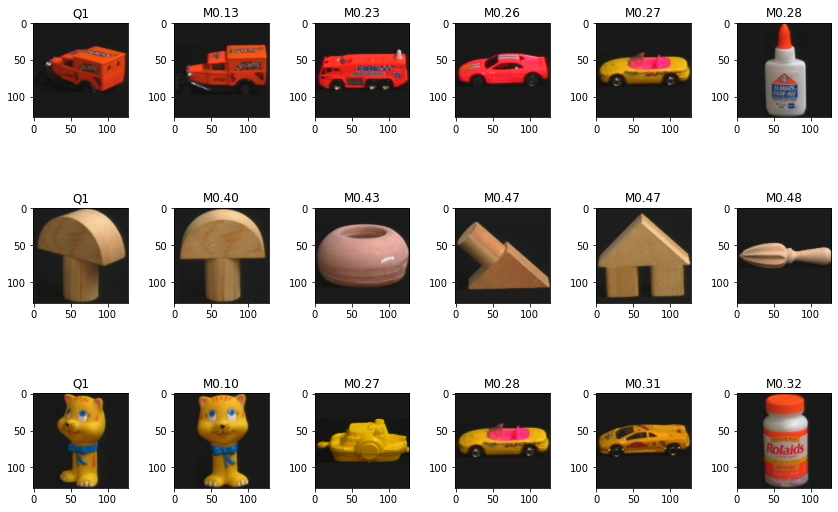

In [72]:
match_module.show_neighbors(model_images, query_images_vis, 'intersect', 'rg', 30)

This model behaviour can be considered better than the previous one. 
We had already reported how robust it was. 
We obtain meaningful results also with very low numbers of bin (63 (0.7077)@ nbins=5).  
It is successful in recognising main objects even in particular lightning situations where other models were less performing. 
For this simulation we have the best scenario with the following configuration: $rate = 65 (0.7303) @ nbins = 30 $

### Second Part

### Colour estimation using RGB channels 

***Testing Chi-Square with RGB channel and 5 bins II.a***


In [111]:
dist_type = 'chi2';
hist_type = 'rgb';
num_bins = 5;

number of correct matches: 78 (0.876404)



***Testing Chi-Squared with RGB channel and 30 bins II.a***


In [112]:
dist_type = 'chi2';
hist_type = 'rgb';
num_bins = 30;

number of correct matches: 71 (0.797753)



***Testing Chi-Squared with RGB channel and 50 bins II.a***


In [113]:
dist_type = 'chi2';
hist_type = 'rgb';
num_bins = 50;

number of correct matches: 69 (0.775281)



<Figure size 432x288 with 0 Axes>

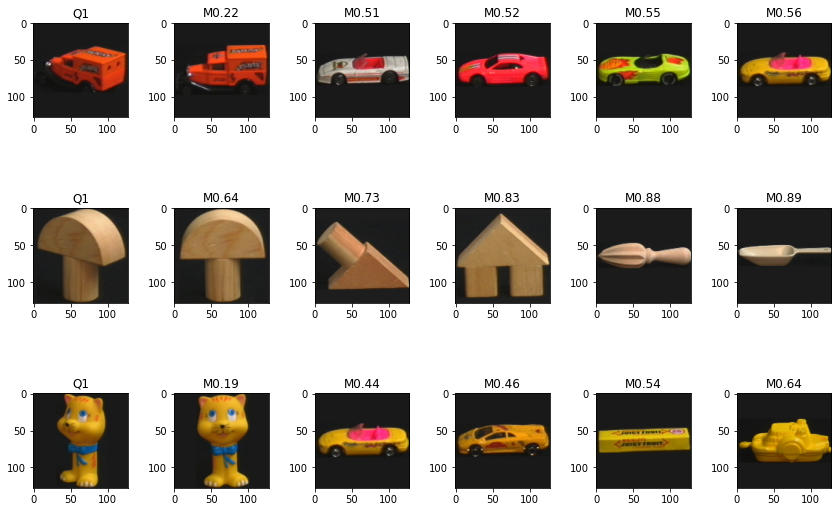

In [76]:
match_module.show_neighbors(model_images, query_images_vis, 'chi2', 'rgb', 30)

In this case we can see how the chi-square model works very well for smaller bins while it tends to perform slightly worse as the number of bins increases. 
For this simulation we have the best scenario with the following configuration: $rate = 78 (0.8764) @ nbins = 5 $

***Testing Euclidean Distance with RGB channel and 5 bins II.b***

In [114]:
dist_type = 'l2';
hist_type = 'rgb';
num_bins = 5;

number of correct matches: 57 (0.640449)



***Testing Euclidean Distance with RGB channel and 30 bins II.b***

In [115]:
dist_type = 'l2';
hist_type = 'rgb';
num_bins = 30;

number of correct matches: 34 (0.382022)



***Testing Euclidean Distance with RGB channel and 50 bins II.b***

In [116]:
dist_type = 'l2';
hist_type = 'rgb';
num_bins = 50;

number of correct matches: 30 (0.337079)



<Figure size 432x288 with 0 Axes>

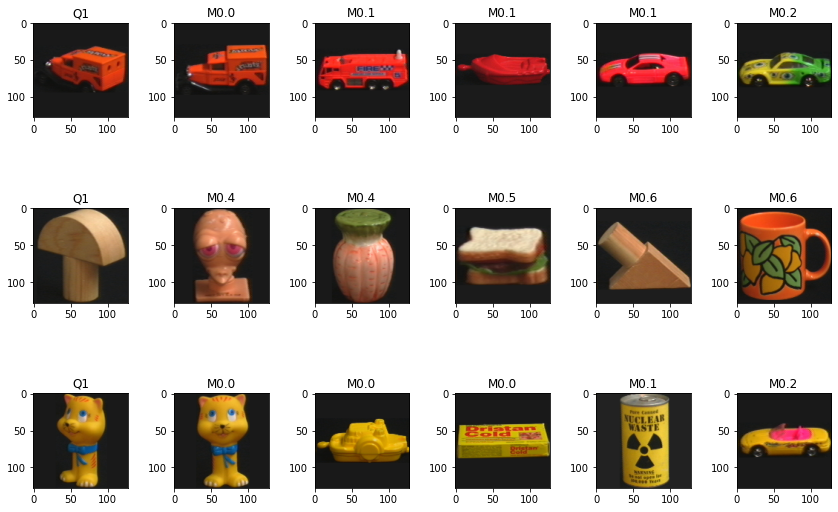

In [140]:
match_module.show_neighbors(model_images, query_images_vis, 'l2', 'rgb', 5)

<Figure size 432x288 with 0 Axes>

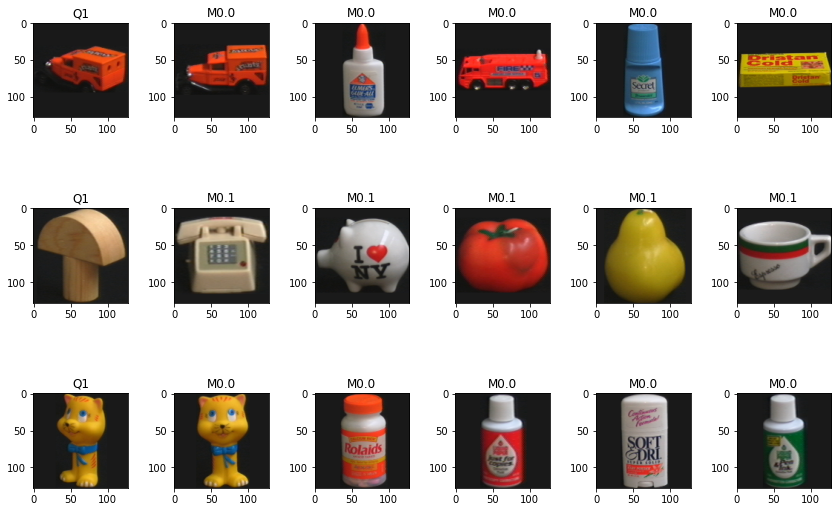

In [141]:
match_module.show_neighbors(model_images, query_images_vis, 'l2', 'rgb', 30)

For this situation we wanted to highlight how the number of correct matches decreases as the number of bins increases. 
For this simulation we have the best scenario with the following configuration: $rate = 57(0.6405) @ nbins = 5 $

***Testing Intersection with RGB channel and 5 bins II.c***

In [117]:
dist_type = 'intersect';
hist_type = 'rgb';
num_bins = 5;

number of correct matches: 69 (0.775281)



***Testing Intersection with RGB channel and 30 bins II.c***

In [118]:
dist_type = 'intersect';
hist_type = 'rgb';
num_bins = 30;

number of correct matches: 72 (0.808989)



***Testing Intersection with RGB channel and 50 bins II.c***

In [119]:
dist_type = 'intersect';
hist_type = 'rgb';
num_bins = 50;

number of correct matches: 70 (0.786517)



<Figure size 432x288 with 0 Axes>

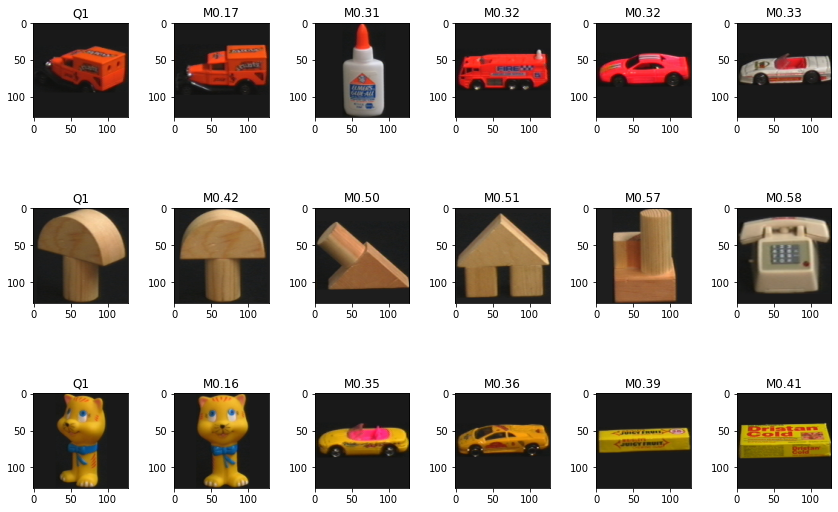

In [120]:
match_module.show_neighbors(model_images, query_images_vis, 'intersect', 'rgb', 30)

The intersection model instead improves the already good results obtained in case I.c. 
As the number of bins increases, the performance of the model remains very good. For this simulation we have the best scenario with the following configuration: $rate = 72 (0.8089)@ nbins=30 $

### Third Part
### Shape estimation using dxdy

***Testing Chi-square with dxdy and 5 bins III.a***

In [121]:
dist_type = 'chi2';
hist_type = 'dxdy';
num_bins = 5;

number of correct matches: 50 (0.561798)



***Testing Chi-square with dxdy and 30 bins III.a***

In [122]:
dist_type = 'chi2';
hist_type = 'dxdy';
num_bins = 30;

number of correct matches: 60 (0.674157)



***Testing Chi-square with dxdy and 50 bins III.a***

In [123]:
dist_type = 'chi2';
hist_type = 'dxdy';
num_bins = 50;

number of correct matches: 56 (0.629213)



<Figure size 432x288 with 0 Axes>

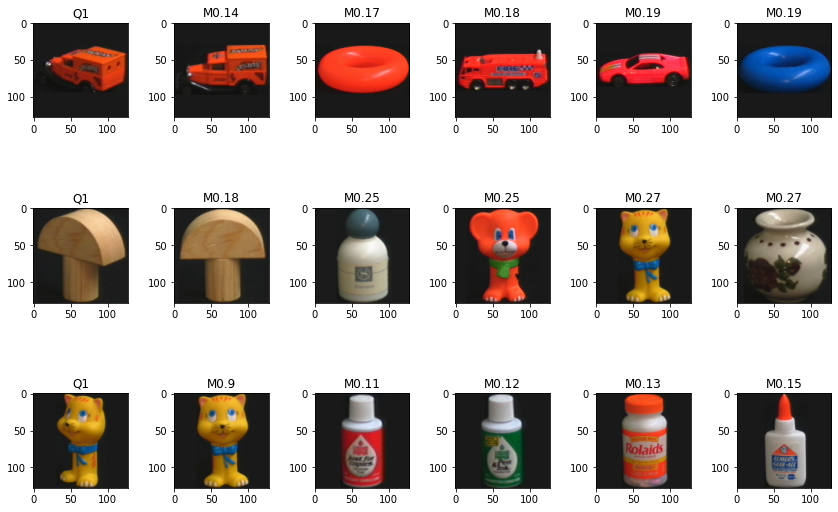

In [95]:
match_module.show_neighbors(model_images, query_images_vis, 'chi2', 'dxdy', 30)

In this third section we report simulations done with the dxdy model. As already mentioned this recognition model focuses mainly on the shape of an image. This can be observed very clearly throughout most of the image comparisons. This can be shown very clearly for the red truck row, in which the recognition image is given a similar distance to the red and the blue donuts (disregarding completely the color of these two objects).
For the chi squared test, we obtain good results, as we have the recognition of the wanted object in all cases. Among those which have the closest estimate to the one sought, we can see how the shape is similar to the original one. 
For this simulation we have the best scenario with the following configuration: $rate = 72 (0.8089)@ nbins=30 $

***Testing Euclidean Distance with dxdy and 5 bins III.b***

In [124]:
dist_type = 'l2';
hist_type = 'dxdy';
num_bins = 5;

number of correct matches: 37 (0.415730)



***Testing Euclidean Distance with dxdy and 30 bins III.b***

In [125]:
dist_type = 'l2';
hist_type = 'dxdy';
num_bins = 30;

number of correct matches: 40 (0.449438)



***Testing Euclidean Distance with dxdy and 50 bins III.b***

In [126]:
dist_type = 'l2';
hist_type = 'dxdy';
num_bins = 50;

number of correct matches: 40 (0.449438)



<Figure size 432x288 with 0 Axes>

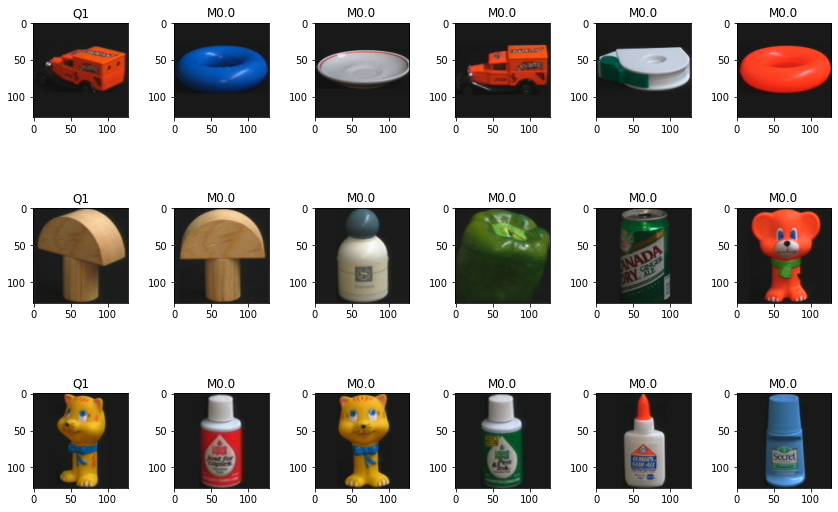

In [91]:
match_module.show_neighbors(model_images, query_images_vis, 'l2', 'dxdy', 30)

These results are quite different from the previous ones, as we get recognition in only one case. The elements considered however present a considerbaly similar shape to each other. 
Colour recognition does not play an important role in this recognition process. 
For this simulation we have the best scenario with the following configuration: $rate = 40(0.4494)@ nbins=30 $

***Testing Intersection with dxdy and 5 bins III.c***

In [127]:
dist_type = 'intersect';
hist_type = 'dxdy';
num_bins = 5;

number of correct matches: 48 (0.539326)



***Testing Intersection with dxdy and 5 bins III.c***

In [128]:
dist_type = 'intersect';
hist_type = 'dxdy';
num_bins = 30;

number of correct matches: 53 (0.595506)



***Testing Intersection with dxdy and 50 bins III.c***

In [129]:
dist_type = 'intersect';
hist_type = 'dxdy';
num_bins = 50;

number of correct matches: 55 (0.617978)



<Figure size 432x288 with 0 Axes>

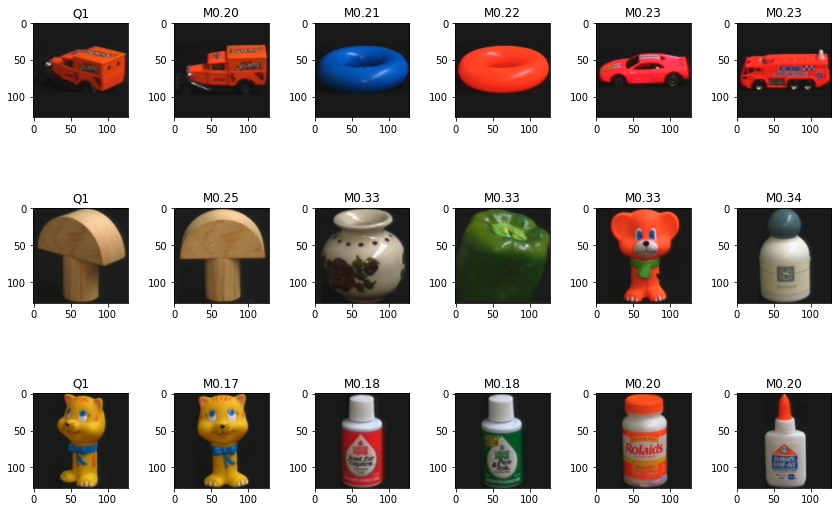

In [142]:
match_module.show_neighbors(model_images, query_images_vis, 'intersect', 'dxdy', 50)

Even this case like the chi-square works well, since elements in the images are recognized with a good distance value. 
For this simulation we have the best scenario with the following configuration: $rate = 55 (0.6179)@ nbins=50 $

### Conclusion: How we find our best Configuration

At the end of the simulations, we conclude that the most efficient models are intersection and chi-square. 
For each simulation based on the number of bins, we took the case where the recognition rate was higher. This implies that the number of matched images is also higher. 


Between the three models, the intersection with chi-square clearly returns the best results, while Euclidean distance has consistently the worst performance. 
Instead, the model based on the intersection obtains excellent results even for a low number of bins. 


Considering a significant number of bins equal to 30 (omitting the case of bins = 5) we find that intersection model has best performances. 
In fact, in the analysis of the RGB histogram gests a recognition rate of 72 (0.808989). 
This case shows that recognition through the RGB channels works properly and is better than the RG channels and position recognition. 
The analysis through RGB channels is not affected by the different positions that the object assumes in space. 
Simulations generally report what was discussed in the theoretical part.

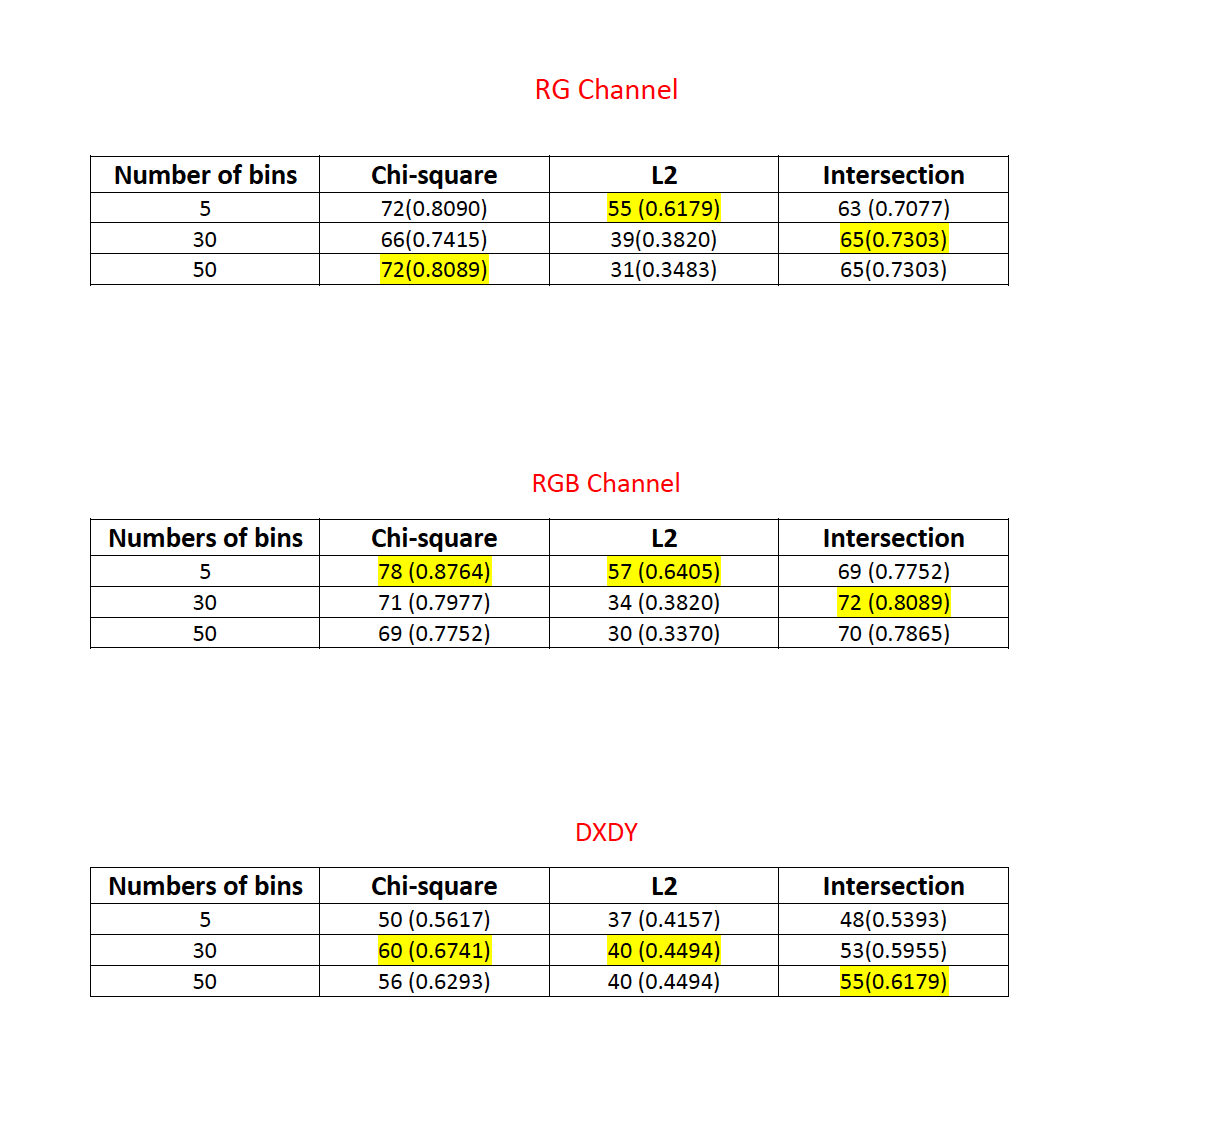

# Question 4 

Finally, we compare different RCP curves relating to different combinations of number of bins, histogram types and distance values. We plot the RCP curve showing different distance values (chi2, intersect and l2) and then, for a given number of bins, we compare the resulting plots of the four histogram types we have worked with (grayvalue, RGB, RG and dxdy). We produce these plots for different number of bins, to identify the best possible combination.

RCP curves include two measures of performance evaluation: precision and recall. Precision is defined as the amount of correct matching images identified over the total number of matching images identified, all with distances smaller than a certain threshold. Whereas, recall is defined as the amount of correct matches with a distance smaller than the threshold over the total number of correct matches, including the ones with distance larger than the set threshold.

In this part of the report, we compare different combinations of the RCP curves to identify the one that gives the best results. We achieve this by experimenting with the number of bins, the histogram types and the distance values, and creating the corresponding RPC curves in order to visually observe their differences.

Each single plot is referring to a type of histogram (RG, RGB or dxdy) and contains the three curves relating to the distance values (chi2, intersect or l2). The plots are organised in sections depending on the number of bins.

### 20 bins

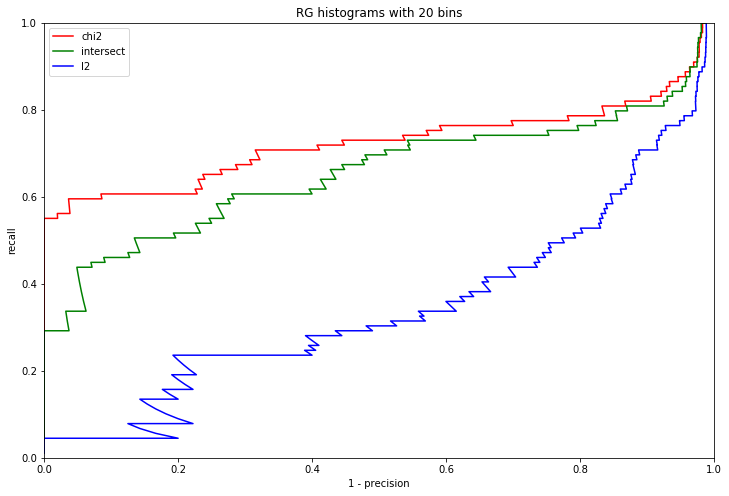

In [5]:
rpc.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 
                     'rg', num_bins, ['r', 'g', 'b'])

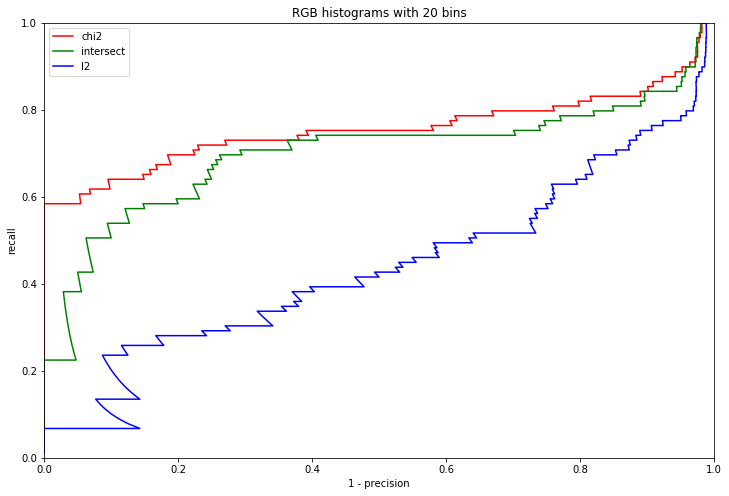

In [6]:
rpc.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 
                     'rgb', num_bins // 2, ['r', 'g', 'b'])

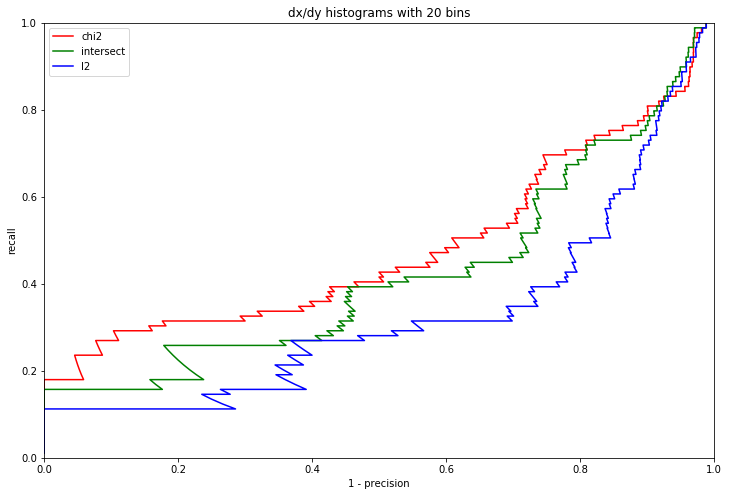

In [7]:
rpc.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 
                     'dxdy', num_bins, ['r', 'g', 'b'])

Based on these graphs, it is clear to see that chi2 is the best distance value, closely followed by intersect, and that histogram types that take into account colours (RG and RGB) give better results than dxdy. We now observe the differences emerging with a smaller and a bigger amount of bins.

### 5 bins

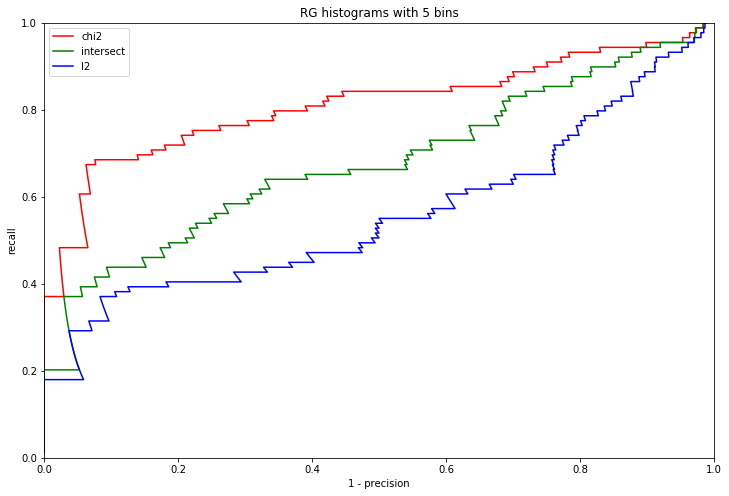

In [9]:
rpc.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 
                     'rg', num_bins, ['r', 'g', 'b'])

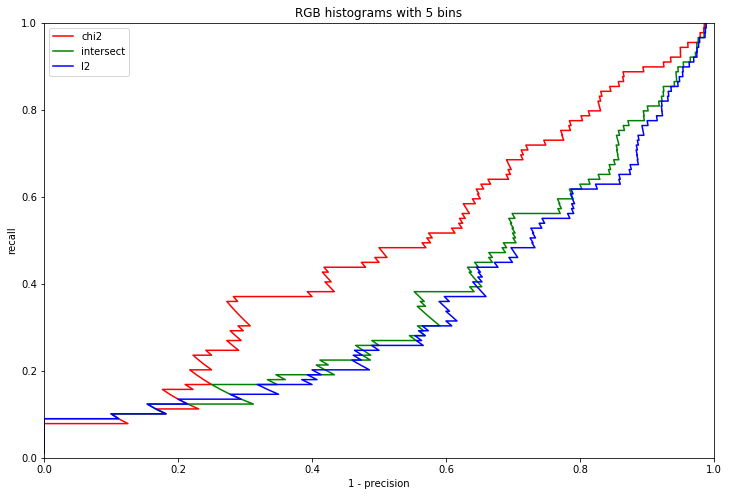

In [10]:
rpc.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 
                     'rgb', num_bins // 2, ['r', 'g', 'b'])

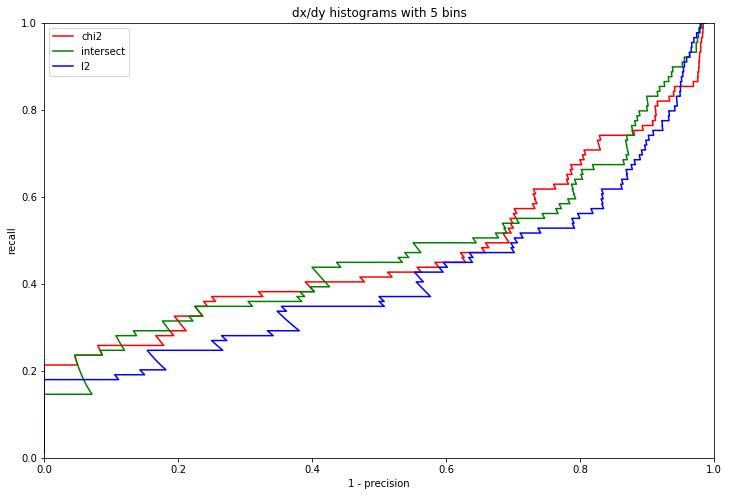

In [11]:
rpc.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 
                     'dxdy', num_bins, ['r', 'g', 'b'])

We see that with a small number of bins it can be even harder to see the differences between distance measures. Instead, it seems that RG gives the best results, but other histogram types are close behind. To better observe all of the differences, we analyse the graphs obtained with a bigger amount of bins.

### 50 bins

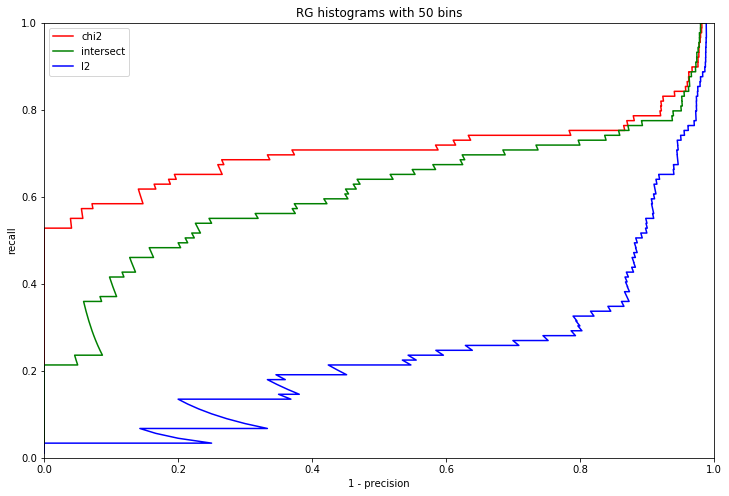

In [13]:
rpc.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 
                     'rg', num_bins, ['r', 'g', 'b'])

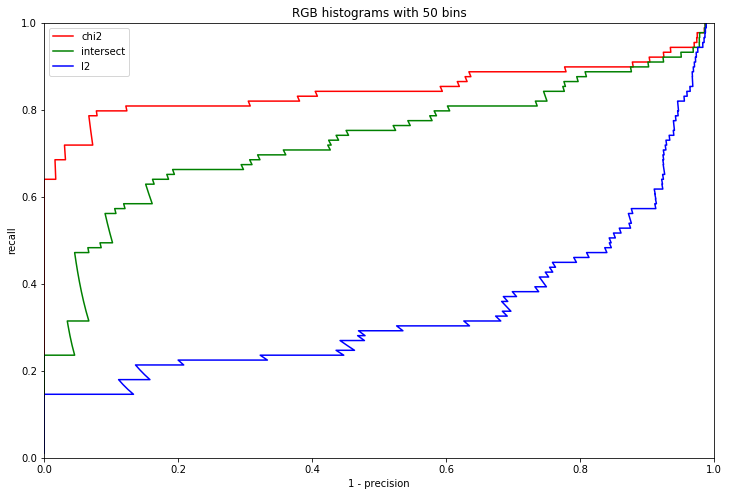

In [14]:
rpc.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 
                     'rgb', num_bins // 2, ['r', 'g', 'b'])

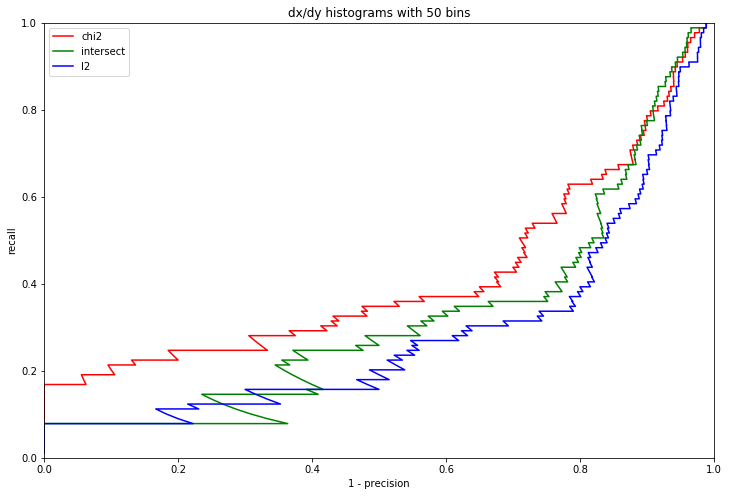

In [15]:
rpc.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 
                     'dxdy', num_bins, ['r', 'g', 'b'])

From these graphs we can conclude that chi2 is the best distance value across all histogram types, followed by intersect and lastly l2. RGB gives the best results when it comes to histogram type, obtaining better results with a greater number of bins compared to RG, while dxdy seems to be the worst one.

### Conclusion

In conclusion, the best option for the distance values is consistently chi2, while for the histogram type it is RGB.